In [2]:
import pandas as pd
df = pd.read_csv("Ev_by_place.csv")

In [17]:
list(df.columns)

['EV Maker',
 'Place',
 'State',
 'Market Share (%)',
 'Production Capacity (Units/Year)',
 'Annual Sales (Units)',
 'Charging Stations',
 'Cluster']

In [20]:
df.head()

,EV Maker,Place,State,Market Share (%),Production Capacity (Units/Year),Annual Sales (Units),Charging Stations,Cluster
0,Tata Motors,Pune,Maharashtra,25.09,134279,243200,1445,2
1,Mahindra Electric,Bengaluru,Karnataka,13.88,170968,4572,870,0
2,Ather Energy,Bengaluru,Karnataka,16.50,260447,262174,34,0
3,Hero Electric,New Delhi,Delhi,25.40,17498,105106,1188,2
4,Ola Electric,Krishnagiri,Tamil Nadu,27.54,419553,97472,1267,2


In [4]:
# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EV Maker                          62 non-null     object 
 1   Place                             62 non-null     object 
 2   State                             62 non-null     object 
 3   Market Share (%)                  62 non-null     float64
 4   Production Capacity (Units/Year)  62 non-null     int64  
 5   Annual Sales (Units)              62 non-null     int64  
 6   Charging Stations                 62 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.5+ KB


(None,
             EV Maker        Place        State  Market Share (%)  \
 0        Tata Motors         Pune  Maharashtra             25.09   
 1  Mahindra Electric    Bengaluru    Karnataka             13.88   
 2       Ather Energy    Bengaluru    Karnataka             16.50   
 3      Hero Electric    New Delhi        Delhi             25.40   
 4       Ola Electric  Krishnagiri   Tamil Nadu             27.54   
 
    Production Capacity (Units/Year)  Annual Sales (Units)  Charging Stations  
 0                            134279                243200               1445  
 1                            170968                  4572                870  
 2                            260447                262174                 34  
 3                             17498                105106               1188  
 4                            419553                 97472               1267  )

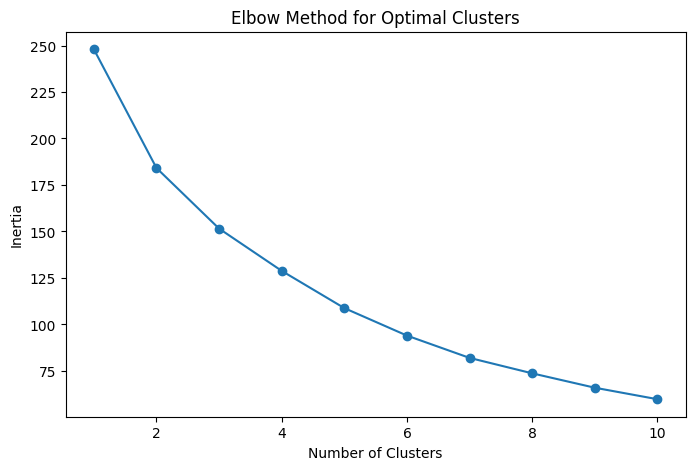

In [5]:
# Elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
features = ["Market Share (%)", "Production Capacity (Units/Year)", 
            "Annual Sales (Units)", "Charging Stations"]
X = df[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [6]:
# visualizations
# Choosing the optimal number of clusters (based on the elbow method, assume k=3)
optimal_k = 3

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Displaying cluster assignments
df[["EV Maker", "Place", "State", "Cluster"]].head(10)


,EV Maker,Place,State,Cluster
0,Tata Motors,Pune,Maharashtra,2
1,Mahindra Electric,Bengaluru,Karnataka,0
2,Ather Energy,Bengaluru,Karnataka,0
3,Hero Electric,New Delhi,Delhi,2
4,Ola Electric,Krishnagiri,Tamil Nadu,2
5,Ashok Leyland,Chennai,Tamil Nadu,0
6,TVS Motor Company,Hosur,Tamil Nadu,1
7,Bajaj Auto,Pune,Maharashtra,1
8,MG Motor India,Halol,Gujarat,2
9,Hyundai Motor India,Chennai,Tamil Nadu,2


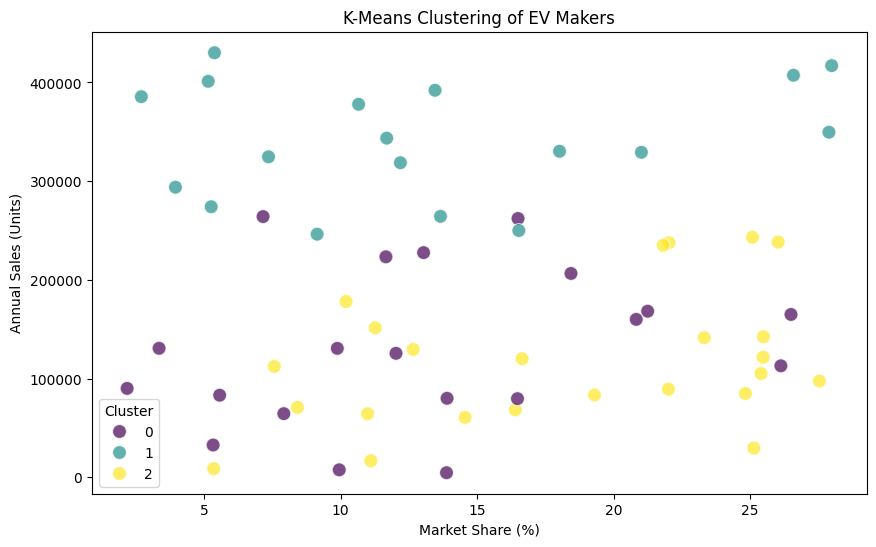

In [7]:
import seaborn as sns

# Plot clusters using a pairplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Market Share (%)"], 
    y=df["Annual Sales (Units)"], 
    hue=df["Cluster"], 
    palette="viridis", 
    s=100, alpha=0.7
)
plt.xlabel("Market Share (%)")
plt.ylabel("Annual Sales (Units)")
plt.title("K-Means Clustering of EV Makers")
plt.legend(title="Cluster")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5372\4167385766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Cluster"], y=df["Market Share (%)"], palette="viridis", ax=axes[0, 0])
C:\Users\hp\AppData\Local\Temp\ipykernel_5372\4167385766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Cluster"], y=df["Production Capacity (Units/Year)"], palette="viridis", ax=axes[0, 1])
C:\Users\hp\AppData\Local\Temp\ipykernel_5372\4167385766.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Cluster"], y=df["Annual Sales (Units)"], pa

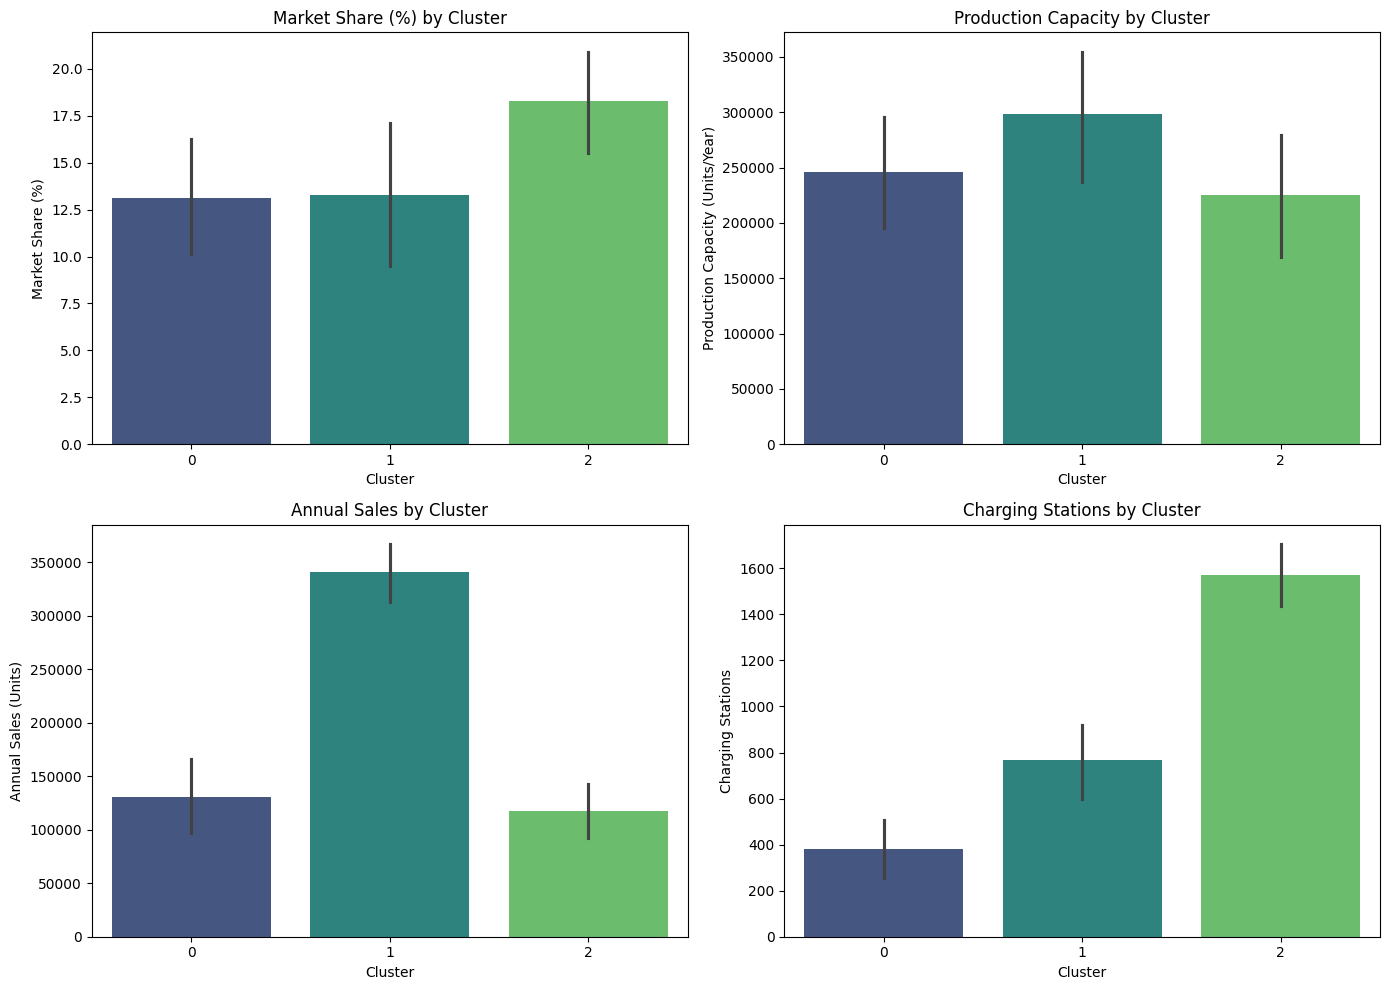

In [8]:
# Creating bar charts for different numerical features grouped by clusters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Market Share by Cluster
sns.barplot(x=df["Cluster"], y=df["Market Share (%)"], palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Market Share (%) by Cluster")

# Production Capacity by Cluster
sns.barplot(x=df["Cluster"], y=df["Production Capacity (Units/Year)"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Production Capacity by Cluster")

# Annual Sales by Cluster
sns.barplot(x=df["Cluster"], y=df["Annual Sales (Units)"], palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Annual Sales by Cluster")

# Charging Stations by Cluster
sns.barplot(x=df["Cluster"], y=df["Charging Stations"], palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Charging Stations by Cluster")

# Adjust layout and display
plt.tight_layout()
plt.show()


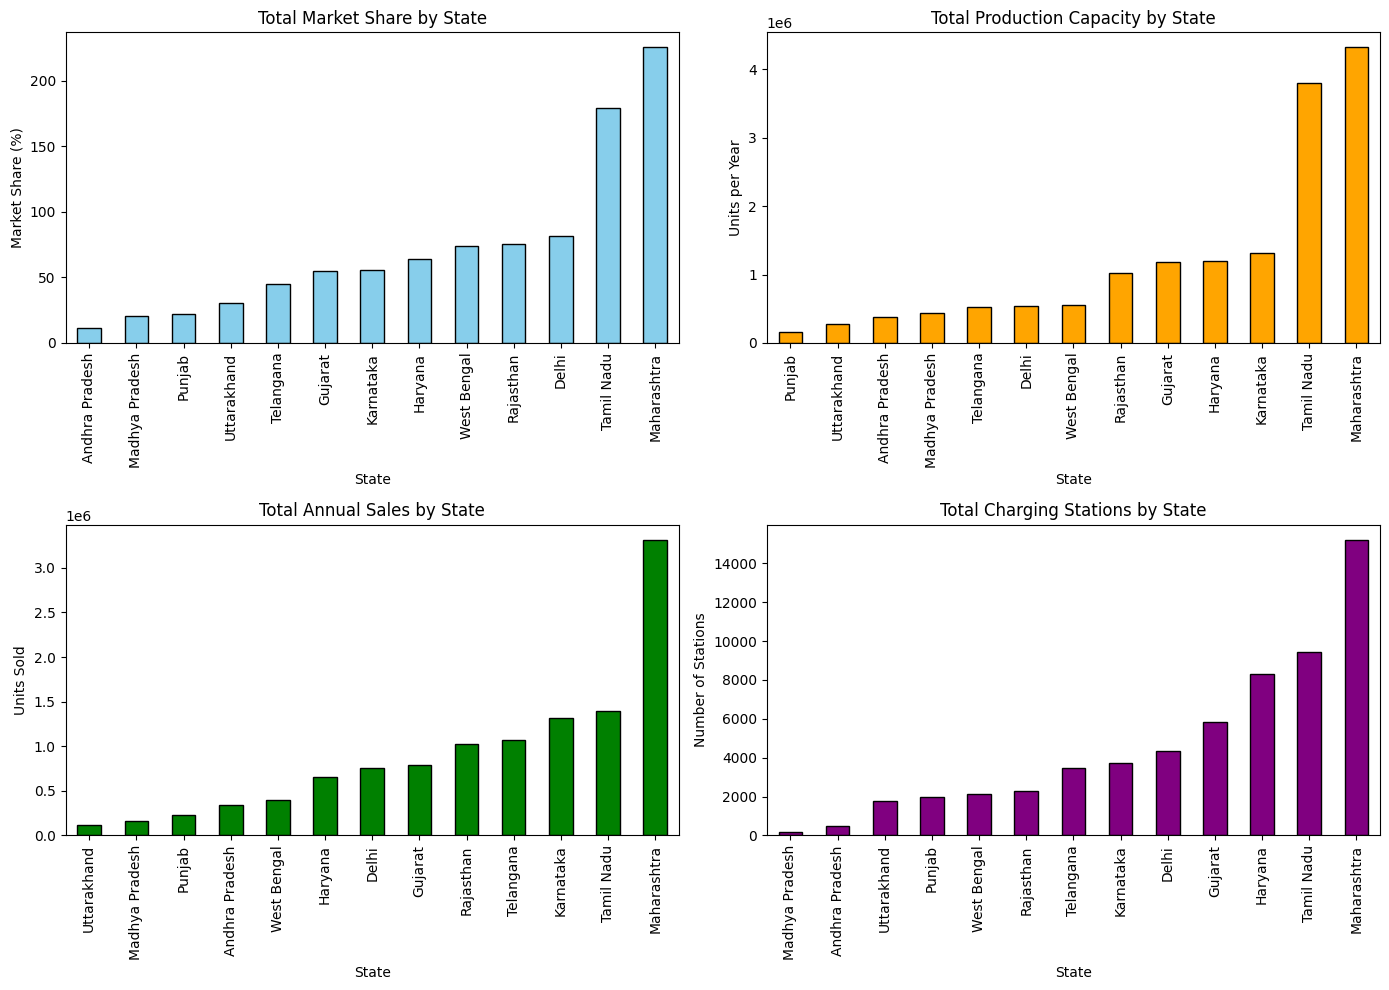

In [9]:
# Aggregate data by state
state_grouped = df.groupby("State")[["Market Share (%)", "Production Capacity (Units/Year)", 
                                     "Annual Sales (Units)", "Charging Stations"]].sum()

# Plot bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
state_grouped["Market Share (%)"].sort_values().plot(kind="bar", ax=axes[0, 0], color="skyblue", edgecolor="black")
axes[0, 0].set_title("Total Market Share by State")
axes[0, 0].set_ylabel("Market Share (%)")

state_grouped["Production Capacity (Units/Year)"].sort_values().plot(kind="bar", ax=axes[0, 1], color="orange", edgecolor="black")
axes[0, 1].set_title("Total Production Capacity by State")
axes[0, 1].set_ylabel("Units per Year")

state_grouped["Annual Sales (Units)"].sort_values().plot(kind="bar", ax=axes[1, 0], color="green", edgecolor="black")
axes[1, 0].set_title("Total Annual Sales by State")
axes[1, 0].set_ylabel("Units Sold")

state_grouped["Charging Stations"].sort_values().plot(kind="bar", ax=axes[1, 1], color="purple", edgecolor="black")
axes[1, 1].set_title("Total Charging Stations by State")
axes[1, 1].set_ylabel("Number of Stations")

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5372\374382491.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_5372\374382491.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


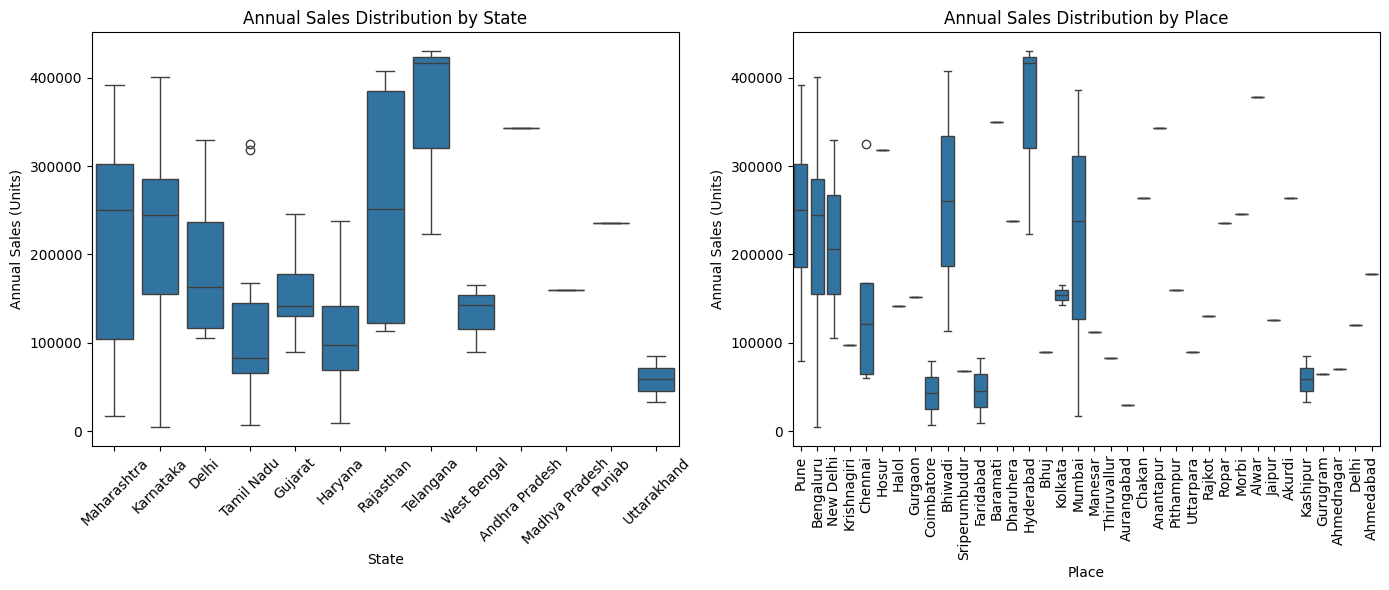

In [10]:
# Creating box plots for Annual Sales distribution by State and Place

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for State-wise distribution
sns.boxplot(x="State", y="Annual Sales (Units)", data=df, ax=axes[0])
axes[0].set_title("Annual Sales Distribution by State")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Annual Sales (Units)")

# Box plot for Place-wise distribution
sns.boxplot(x="Place", y="Annual Sales (Units)", data=df, ax=axes[1])
axes[1].set_title("Annual Sales Distribution by Place")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Annual Sales (Units)")

plt.tight_layout()
plt.show()


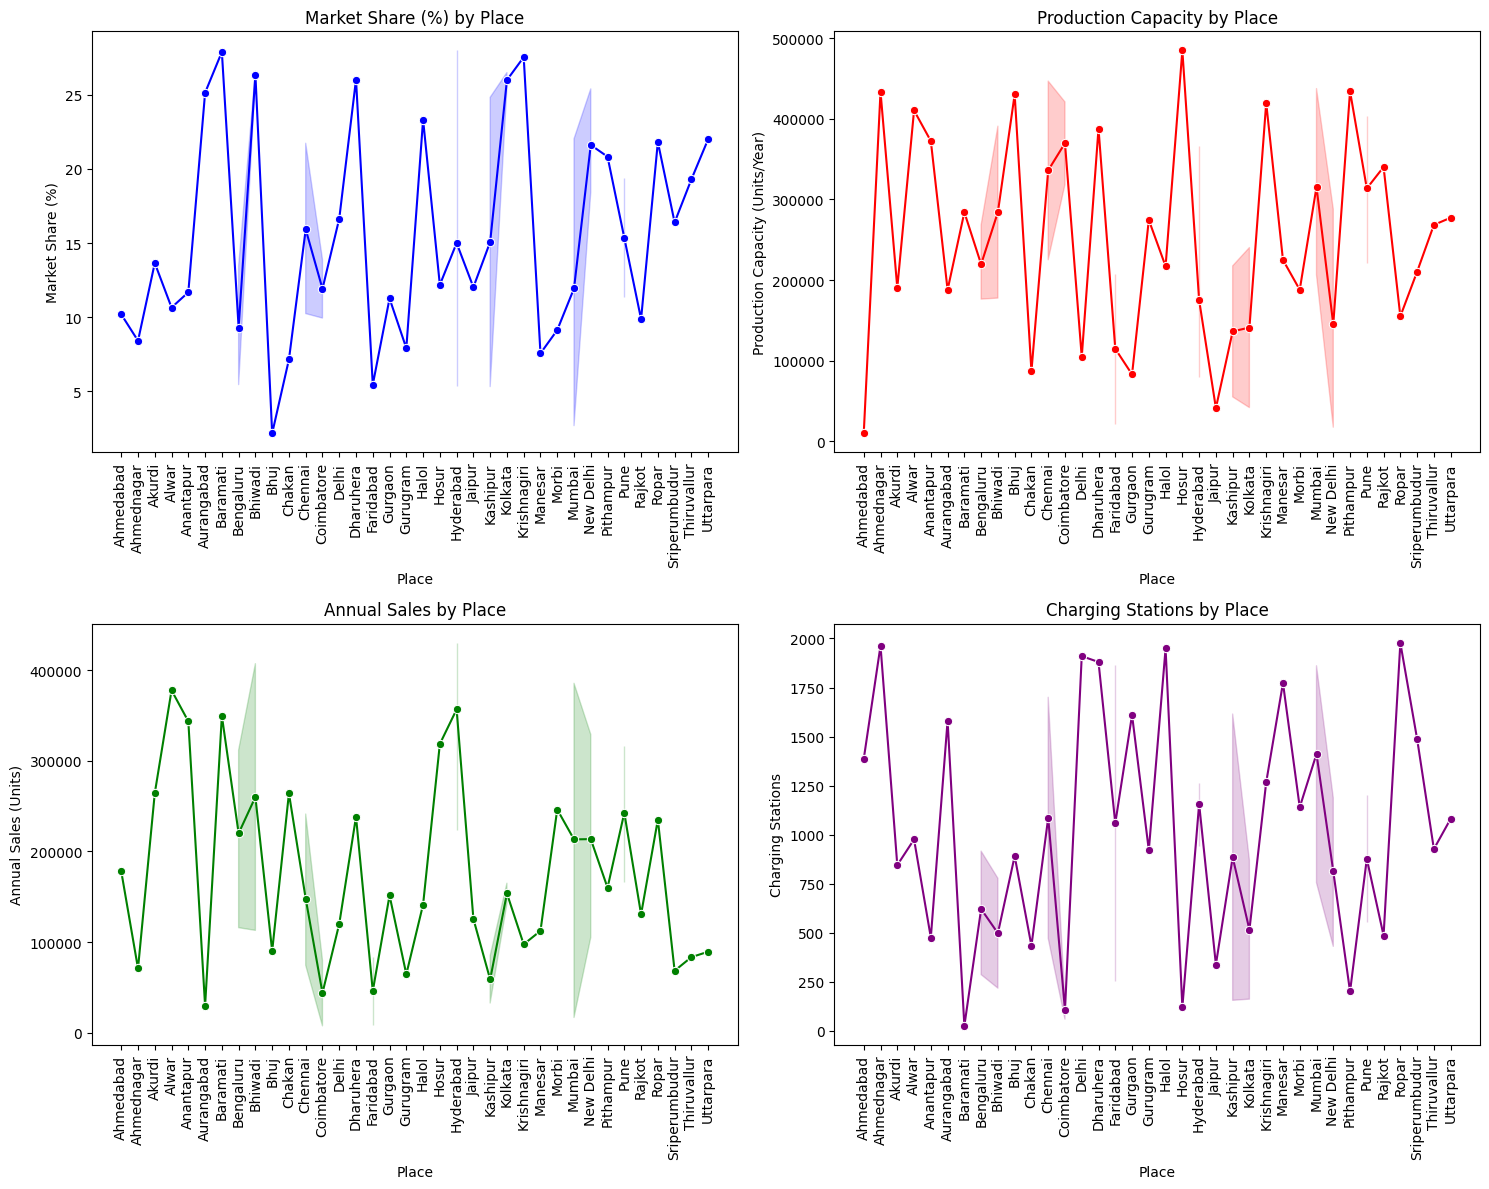

In [11]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sorting data by Place for better visualization
df_sorted = df.sort_values("Place")

# Line plots for different metrics
sns.lineplot(x="Place", y="Market Share (%)", data=df_sorted, marker='o', ax=axes[0, 0], color='b')
axes[0, 0].set_title("Market Share (%) by Place")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Production Capacity (Units/Year)", data=df_sorted, marker='o', ax=axes[0, 1], color='r')
axes[0, 1].set_title("Production Capacity by Place")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Annual Sales (Units)", data=df_sorted, marker='o', ax=axes[1, 0], color='g')
axes[1, 0].set_title("Annual Sales by Place")
axes[1, 0].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Charging Stations", data=df_sorted, marker='o', ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Charging Stations by Place")
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a suppo

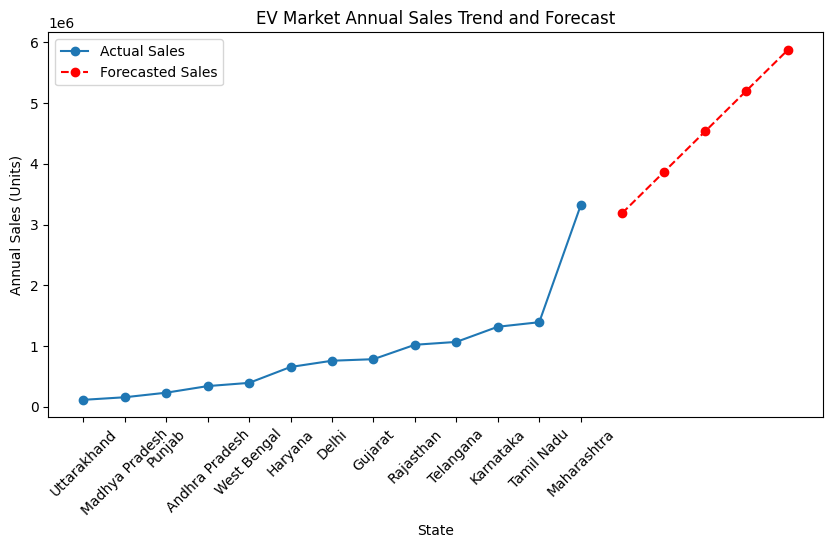

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregating sales data by year (assuming dataset represents one year)
df_trend = df.groupby("State")["Annual Sales (Units)"].sum().reset_index()

# Sorting by total sales to identify growth trends
df_trend = df_trend.sort_values(by="Annual Sales (Units)")

# Fitting an Exponential Smoothing model
model = ExponentialSmoothing(df_trend["Annual Sales (Units)"], trend="add", seasonal=None)
fit_model = model.fit()

# Forecasting the next 5 years
future_steps = 5
future_sales = fit_model.forecast(future_steps)

# Plotting trend
plt.figure(figsize=(10, 5))
plt.plot(df_trend["State"], df_trend["Annual Sales (Units)"], marker="o", label="Actual Sales")
plt.plot(range(len(df_trend), len(df_trend) + future_steps), future_sales, marker="o", linestyle="dashed", label="Forecasted Sales", color="red")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Annual Sales (Units)")
plt.title("EV Market Annual Sales Trend and Forecast")
plt.legend()
plt.show()
